In [72]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

In [2]:
df=pd.read_csv('digital_wallet_ltv_dataset.csv')
df.head(3)

,Customer_ID,Age,Location,Income_Level,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,App_Usage_Frequency,Preferred_Payment_Method,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV
0,cust_0000,54,Urban,Low,192,16736.384023,60216.834510,6525.814861,3.213386e+06,140,209,2114,25,2224.012140,Monthly,Debit Card,3,61.568590,1,3.279546e+05
1,cust_0001,67,Suburban,High,979,14536.734683,48350.100272,2186.742245,1.423146e+07,229,240,2960,20,4026.823518,Monthly,UPI,17,60.392889,8,1.437053e+06
2,cust_0002,44,Urban,High,329,7061.372800,32521.157187,2743.406808,2.323192e+06,73,21,3170,0,1441.011395,Monthly,Debit Card,11,45.305579,4,2.419387e+05


In [3]:
print(df.isnull().sum())
df.dtypes

Customer_ID                    0
Age                            0
Location                       0
Income_Level                   0
Total_Transactions             0
Avg_Transaction_Value          0
Max_Transaction_Value          0
Min_Transaction_Value          0
Total_Spent                    0
Active_Days                    0
Last_Transaction_Days_Ago      0
Loyalty_Points_Earned          0
Referral_Count                 0
Cashback_Received              0
App_Usage_Frequency            0
Preferred_Payment_Method       0
Support_Tickets_Raised         0
Issue_Resolution_Time          0
Customer_Satisfaction_Score    0
LTV                            0
dtype: int64


Customer_ID                     object
Age                              int64
Location                        object
Income_Level                    object
Total_Transactions               int64
Avg_Transaction_Value          float64
Max_Transaction_Value          float64
Min_Transaction_Value          float64
Total_Spent                    float64
Active_Days                      int64
Last_Transaction_Days_Ago        int64
Loyalty_Points_Earned            int64
Referral_Count                   int64
Cashback_Received              float64
App_Usage_Frequency             object
Preferred_Payment_Method        object
Support_Tickets_Raised           int64
Issue_Resolution_Time          float64
Customer_Satisfaction_Score      int64
LTV                            float64
dtype: object

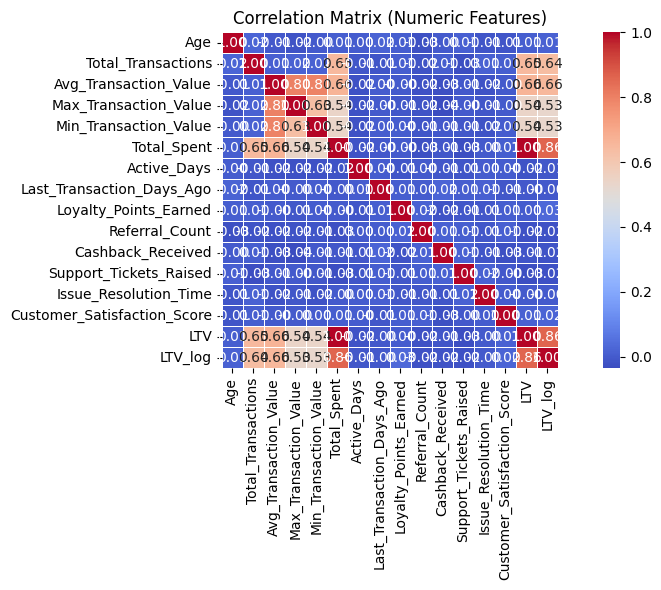

In [62]:
numeric_df = df.select_dtypes(include='number')

# 2. Compute correlation matrix
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=0.5)
plt.title("Correlation Matrix (Numeric Features)")
plt.tight_layout()
plt.show()

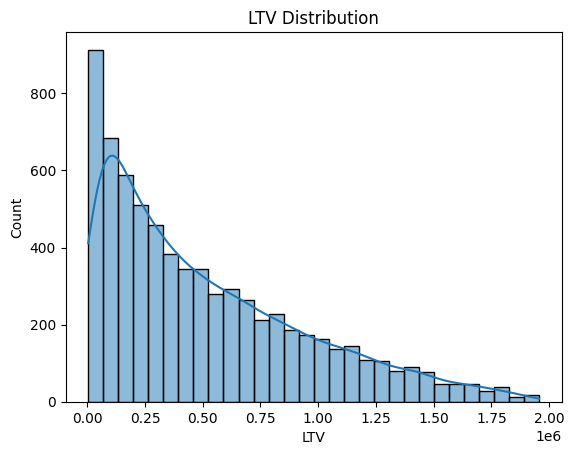

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['LTV'], kde=True)
plt.title("LTV Distribution")
plt.show()


In [17]:
df['LTV_log']=np.log1p(df['LTV'])

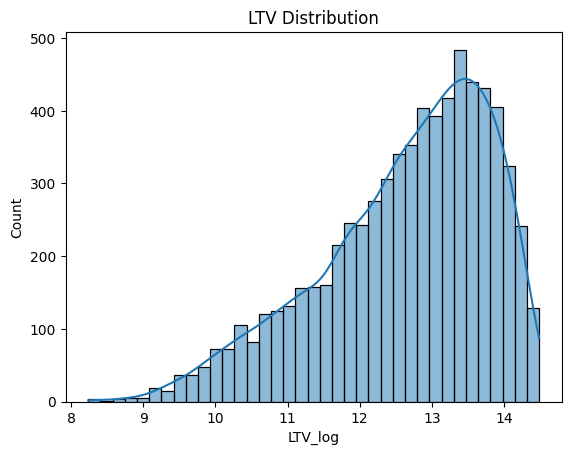

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['LTV_log'], kde=True)
plt.title("LTV Distribution")
plt.show()


In [77]:
X=numeric_df
y=df['LTV_log']

In [78]:
num_feature=X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_feature=X.select_dtypes(include=['object']).columns.tolist()

In [79]:
preprocessor=ColumnTransformer([
    ('num',StandardScaler(),num_feature),
    ('cat',OneHotEncoder(handle_unknown='ignore'),cat_feature)
]
)

In [80]:
model=Pipeline([
    ('preprocess',preprocessor),
    ('reggresor',XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42))
])

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [82]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Total_Transactions',
                                                   'Avg_Transaction_Value',
                                                   'Max_Transaction_Value',
                                                   'Min_Transaction_Value',
                                                   'Total_Spent', 'Active_Days',
                                                   'Last_Transaction_Days_Ago',
                                                   'Loyalty_Points_Earned',
                                                   'Referral_Count',
                                                   'Cashback_Received',
                                                   'Support_Tickets_Raised',
                                                   'Issue_Resolution_Time...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=4, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [83]:
y_pred=model.predict(X_test)
mse=mean_squared_error(np.expm1(y_test),np.expm1(y_pred))
mae=mean_absolute_error(np.expm1(y_test),np.expm1(y_pred))
print('mse:',mse)
print("mae:",mae)

mse: 17956133.45544441
mae: 2393.3016184437593


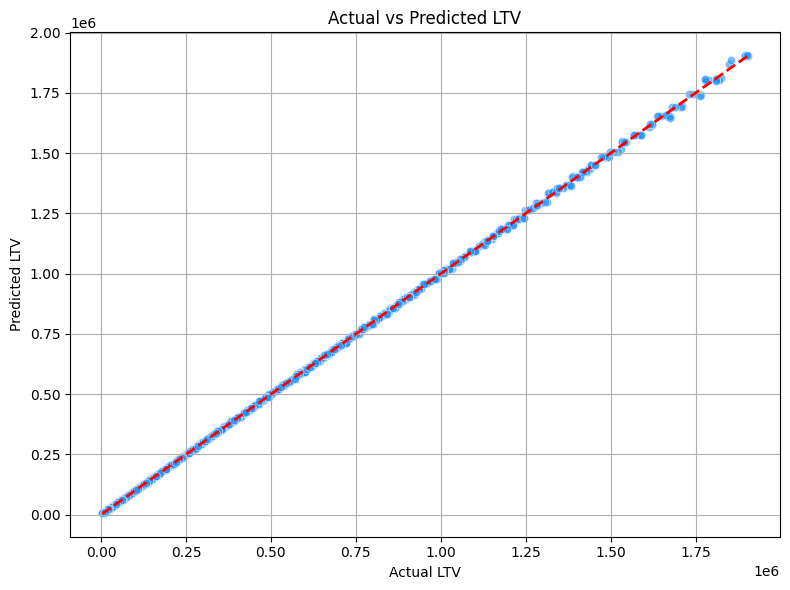

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_exp, y=y_pred_exp, alpha=0.6, color='dodgerblue')
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], 'r--', lw=2) 
plt.xlabel('Actual LTV')
plt.ylabel('Predicted LTV')
plt.title('Actual vs Predicted LTV')
plt.grid(True)
plt.tight_layout()
plt.show()


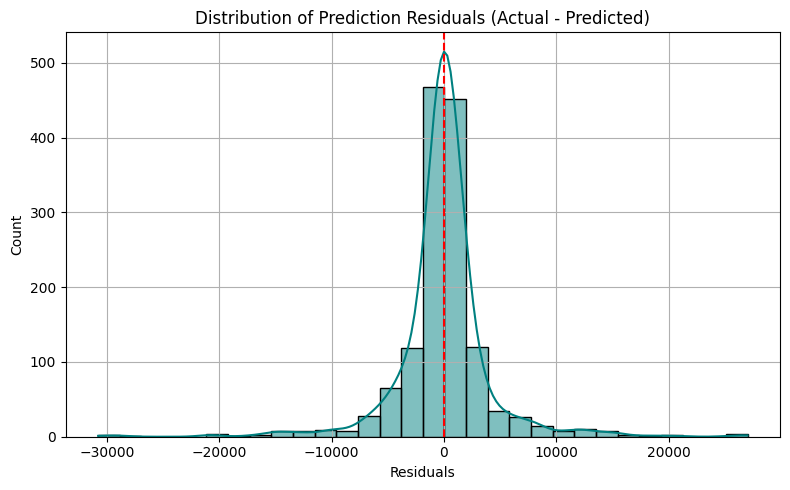

In [85]:
residuals = y_test_exp - y_pred_exp

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True, color='teal')
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribution of Prediction Residuals (Actual - Predicted)')
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()


In [88]:
import joblib
joblib.dump(model, 'model.pkl')


['model.pkl']